In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)
import matplotlib as mlp
mlp.rcParams['axes.unicode_minus'] = False

In [2]:
import mglearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris, load_boston, load_breast_cancer

In [3]:
from sklearn.tree import export_graphviz
import graphviz

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 1. 투표(Voting)의 유형
- XAI: 설명가능한 인공지능. 왜 예측이 틀렸는지를 설명
- Soft Voting
    - 각 분류기의 0과 1의 예측 확률을 평균을 내어 그 평균 값으로 최종 결과를 산출
    
- Hard Voting
    - 각 분류기의 예측 결과만을 참고하여 최종 예측 값을 산출

# 2. 종류
- Bagging
    - Bootstrap Aggregating
    - 중첩될 수 있는 서로 다른 데이터셋에서 각각의 분류기가 모두 같은 유형의 알고리즘을 기반으로 사용되는 방식
    - 분류기? 알고리즘?
    - 학습 데이터에 대해 여러개의 Bootstrap 데이터를 생성하고 각 부트스트랩 데이터에 여러 알고리즘을 학습시킨 후 산출된 결과 중 투표방식에 의해 최종 결과를 선정
    - RandomForest는 일반화된 Bagging 방식이다.
- Boosting
    - 학습기를 순차적으로 학습-예측을 진행한다.
    - 여러개의 분류기(DecisionTree)가 순차적으로 학습을 하되 학습한 분류기가 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
    - 단점
        - 과적합으로 인해 일반화가 어렵다.
        - 파라미터 튜닝이 까다롭다
        - 수행시간이 오래 걸린다
    - 종류
        - AdaBoost
        - GradientBoost( * )
            - GradientBoostMachine(GBM)
            - XGBoost
            - LightGBM
- Stacking
    - 여러 학습기에서 예측한 예측값(Predict Value)을 다시 학습 데이터로 하여 일반화된 최종 모델을 구성하는 방법

# 3. Voting 실습
## (1) Classification
### 1) 예제 1

In [6]:
X_train= pd.read_csv('data/X_final_C.csv')
X_test= pd.read_csv('data/test_final_C.csv')
y_train= pd.read_csv('data/y_train_C.csv')
y_test= pd.read_csv('data/y_test_C.csv')

In [7]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.566667,0.428571,0.0,0,1,1,0,0,1,1,0
1,0.4,0.200000,0.285714,0.0,0,1,0,1,0,1,1,0
2,0.3,0.600000,0.714286,0.0,0,1,0,1,1,0,1,0
3,0.4,0.500000,0.428571,1.0,0,1,0,1,1,0,1,0
4,0.0,0.566667,0.285714,0.0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1385,0.6,0.900000,0.714286,1.0,0,1,0,1,0,1,1,0
1386,0.8,0.733333,0.857143,0.0,0,1,0,1,1,0,0,1
1387,0.4,0.500000,0.428571,0.0,0,1,0,1,1,0,1,0
1388,0.5,0.766667,0.428571,0.0,0,1,1,0,0,1,0,1


#### Hard Voting

In [11]:
logit_model= LogisticRegression(random_state=42)
rnf_model= RandomForestClassifier(random_state=42)
svm_model= SVC(random_state=42)

voting_hard= VotingClassifier(estimators=[('lr',logit_model),('rf', rnf_model), ('svc', svm_model)], voting= 'hard')

voting_hard.fit(X_train, y_train)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [14]:
for clf in (logit_model, rnf_model, svm_model, voting_hard):
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Local\Temp\ipykernel_76100\1047911803.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression 0.7638190954773869
RandomForestClassifier 0.7721943048576214
SVC 0.7688442211055276


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.7738693467336684


In [19]:
?confusion_matrix
# TN FN
# FP TP

In [15]:
#### LogisticRegression 훈련 데이터 오차 행렬
print(confusion_matrix(y_train, logit_model.predict(X_train)))
#### LogisticRegression 테스트 데이터 오차 행렬
print(confusion_matrix(y_test, logit_model.predict(X_test)))

[[832  61]
 [255 242]]


In [17]:
#### RandomForest 훈련 데이터 오차 행렬
print(confusion_matrix(y_train, rnf_model.predict(X_train)))
#### RandomForest 테스트 데이터 오차 행렬
print(confusion_matrix(y_test, rnf_model.predict(X_test)))

[[867  26]
 [ 74 423]]
[[334  50]
 [ 86 127]]


In [18]:
#### SVC 훈련 데이터 오차 행렬
print(confusion_matrix(y_train, svm_model.predict(X_train)))
#### SVC 테스트 데이터 오차 행렬
print(confusion_matrix(y_test, svm_model.predict(X_test)))

[[860  33]
 [253 244]]
[[362  22]
 [116  97]]


In [20]:
#### Voting 훈련 데이터 오차 행렬
print(confusion_matrix(y_train, voting_hard.predict(X_train)))
#### Voting 테스트 데이터 오차 행렬
print(confusion_matrix(y_test, voting_hard.predict(X_test)))

[[862  31]
 [242 255]]
[[362  22]
 [113 100]]


#### - Soft Voting

In [5]:
X_train= pd.read_csv('data/X_final_C.csv')
X_test= pd.read_csv('data/test_final_C.csv')
y_train= pd.read_csv('data/y_train_C.csv')
y_test= pd.read_csv('data/y_test_C.csv')

In [9]:
logit_model= LogisticRegression(random_state=42)
rnf_model= RandomForestClassifier(random_state=42)
svm_model= SVC(probability=True, random_state=42)

voting_soft= VotingClassifier(estimators=[('lr',logit_model),('rf', rnf_model), ('svc', svm_model)], voting= 'soft')

voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [10]:
for clf in (logit_model, rnf_model, svm_model, voting_soft):
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7638190954773869
RandomForestClassifier 0.7721943048576214
SVC 0.7688442211055276
VotingClassifier 0.7839195979899497


In [12]:
#### Voting 훈련 데이터 오차 행렬
print(confusion_matrix(y_train, voting_soft.predict(X_train)))
#### Voting 테스트 데이터 오차 행렬
print(confusion_matrix(y_test, voting_soft.predict(X_test)))

[[867  26]
 [194 303]]
[[354  30]
 [ 99 114]]


## (2) Regression
### 1) 예제 1

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [16]:
X_train= pd.read_csv('data/X_final_R.csv')
X_test= pd.read_csv('data/test_final_R.csv')
y_train= pd.read_csv('data/y_train_R.csv')
y_test= pd.read_csv('data/y_test_R.csv')

In [17]:
linear_model= LinearRegression()
rnf_model= RandomForestRegressor(random_state=42)
voting_regressor= VotingRegressor(estimators=[('lr',linear_model),('rf', rnf_model)])
# hard, soft 없음
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=42))])

In [18]:
# 설명력
voting_regressor.score(X_train, y_train)
voting_regressor.score(X_test, y_test)

0.6239084076325578

In [20]:
# RMSE
from sklearn.metrics import mean_squared_error

pred_train= voting_regressor.predict(X_train)
MSE_train= mean_squared_error(y_train, pred_train)
print('훈련데이터 평균오차: ', np.sqrt(MSE_train))

pred_test= voting_regressor.predict(X_test)
MSE_test= mean_squared_error(y_test, pred_test)
print('테스트데이터 평균오차: ', np.sqrt(MSE_test))

훈련데이터 평균오차:  53.046634874015865
테스트데이터 평균오차:  77.53831029380439


# 4. Bagging 실습
- 전체 데이터 중 임의로 추출된 데이터를 각각 알고리즘에서 학습
- RandomForest

In [21]:
X_train= pd.read_csv('data/X_final_C.csv')
X_test= pd.read_csv('data/test_final_C.csv')
y_train= pd.read_csv('data/y_train_C.csv')
y_test= pd.read_csv('data/y_test_C.csv')

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [24]:
model= BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [25]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7942446043165468
0.7654941373534339


In [26]:
pred_train= model.predict(X_train)
pred_test= model.predict(X_test)

In [28]:
print('훈련 데이터의 오차행렬\n', confusion_matrix(y_train, pred_train))
print('--------------')
print('테스트 데이터의 오차행렬\n', confusion_matrix(y_test, pred_test))

훈련 데이터의 오차행렬
 [[861  32]
 [254 243]]
--------------
테스트 데이터의 오차행렬
 [[361  23]
 [117  96]]


In [29]:
print('훈련데이터의 분류예측 레포트\n', classification_report(y_train, pred_train))

훈련데이터의 분류예측 레포트
               precision    recall  f1-score   support

           0       0.77      0.96      0.86       893
           1       0.88      0.49      0.63       497

    accuracy                           0.79      1390
   macro avg       0.83      0.73      0.74      1390
weighted avg       0.81      0.79      0.78      1390



In [31]:
print('테스트데이터의 분류예측 레포트\n', classification_report(y_test, pred_test))

테스트데이터의 분류예측 레포트
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       384
           1       0.81      0.45      0.58       213

    accuracy                           0.77       597
   macro avg       0.78      0.70      0.71       597
weighted avg       0.77      0.77      0.75       597



## (2) Regression

In [32]:
X_train= pd.read_csv('data/X_final_R.csv')
X_test= pd.read_csv('data/test_final_R.csv')
y_train= pd.read_csv('data/y_train_R.csv')
y_test= pd.read_csv('data/y_test_R.csv')

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [34]:
model= BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=10, random_state= 0)

model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), random_state=0)

In [35]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7096875846630044
0.5833223330736411


In [36]:
pred_train= model.predict(X_train)
MSE_train= mean_squared_error(y_train, pred_train)
print('훈련데이터 평균오차: ', np.sqrt(MSE_train))

pred_test= model.predict(X_test)
MSE_test= mean_squared_error(y_test, pred_test)
print('테스트데이터 평균오차: ', np.sqrt(MSE_test))

훈련데이터 평균오차:  67.55627570570738
테스트데이터 평균오차:  81.61493370530255


# 5. Boosting 실습
## (1) Classitication

In [37]:
X_train= pd.read_csv('data/X_final_C.csv')
X_test= pd.read_csv('data/test_final_C.csv')
y_train= pd.read_csv('data/y_train_C.csv')
y_test= pd.read_csv('data/y_test_C.csv')

### 1) AdaBoosting

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
model= AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [40]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8201438848920863
0.7989949748743719


In [41]:
pred_train= model.predict(X_train)
pred_test= model.predict(X_test)

In [42]:
print('훈련 데이터의 오차행렬\n', confusion_matrix(y_train, pred_train))
print('--------------')
print('테스트 데이터의 오차행렬\n', confusion_matrix(y_test, pred_test))

훈련 데이터의 오차행렬
 [[873  20]
 [230 267]]
--------------
테스트 데이터의 오차행렬
 [[372  12]
 [108 105]]


In [43]:
print('훈련데이터의 분류예측 레포트\n', classification_report(y_train, pred_train))

훈련데이터의 분류예측 레포트
               precision    recall  f1-score   support

           0       0.79      0.98      0.87       893
           1       0.93      0.54      0.68       497

    accuracy                           0.82      1390
   macro avg       0.86      0.76      0.78      1390
weighted avg       0.84      0.82      0.81      1390



In [44]:
print('테스트데이터의 분류예측 레포트\n', classification_report(y_test, pred_test))

테스트데이터의 분류예측 레포트
               precision    recall  f1-score   support

           0       0.78      0.97      0.86       384
           1       0.90      0.49      0.64       213

    accuracy                           0.80       597
   macro avg       0.84      0.73      0.75       597
weighted avg       0.82      0.80      0.78       597



### 2) GradientBoosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [47]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8244604316546763
0.8056951423785594


In [48]:
pred_train= model.predict(X_train)
pred_test= model.predict(X_test)

In [49]:
print('훈련 데이터의 오차행렬\n', confusion_matrix(y_train, pred_train))
print('--------------')
print('테스트 데이터의 오차행렬\n', confusion_matrix(y_test, pred_test))

훈련 데이터의 오차행렬
 [[871  22]
 [222 275]]
--------------
테스트 데이터의 오차행렬
 [[371  13]
 [103 110]]


In [50]:
print('훈련데이터의 분류예측 레포트\n', classification_report(y_train, pred_train))

훈련데이터의 분류예측 레포트
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       893
           1       0.93      0.55      0.69       497

    accuracy                           0.82      1390
   macro avg       0.86      0.76      0.78      1390
weighted avg       0.84      0.82      0.81      1390



In [51]:
print('테스트데이터의 분류예측 레포트\n', classification_report(y_test, pred_test))

테스트데이터의 분류예측 레포트
               precision    recall  f1-score   support

           0       0.78      0.97      0.86       384
           1       0.89      0.52      0.65       213

    accuracy                           0.81       597
   macro avg       0.84      0.74      0.76       597
weighted avg       0.82      0.81      0.79       597



## (2) Regression

In [58]:
X_train= pd.read_csv('data/X_final_R.csv')
X_test= pd.read_csv('data/test_final_R.csv')
y_train= pd.read_csv('data/y_train_R.csv')
y_test= pd.read_csv('data/y_test_R.csv')

### 1) AdaBoosting

In [53]:
from sklearn.ensemble import AdaBoostRegressor

In [59]:
model= AdaBoostRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [60]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.29695728654825215
0.27200565799961796


In [61]:
pred_train= model.predict(X_train)
MSE_train= mean_squared_error(y_train, pred_train)
print('훈련데이터 평균오차: ', np.sqrt(MSE_train))

pred_test= model.predict(X_test)
MSE_test= mean_squared_error(y_test, pred_test)
print('테스트데이터 평균오차: ', np.sqrt(MSE_test))

훈련데이터 평균오차:  105.12929466476501
테스트데이터 평균오차:  107.87815798537731


### 2) GradientBoosting

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
?GradientBoostingRegressor

In [63]:
model= GradientBoostingRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [64]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6971712683907527
0.6168063010725628


In [65]:
pred_train= model.predict(X_train)
MSE_train= mean_squared_error(y_train, pred_train)
print('훈련데이터 평균오차: ', np.sqrt(MSE_train))

pred_test= model.predict(X_test)
MSE_test= mean_squared_error(y_test, pred_test)
print('테스트데이터 평균오차: ', np.sqrt(MSE_test))

훈련데이터 평균오차:  68.99719473408665
테스트데이터 평균오차:  78.26700222894027


## (3) Breast Cancer Sample
분류

In [67]:
cancer= load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, random_state=42)

### 1) GradientBoostingClassifier

In [68]:
model= GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.958041958041958


In [69]:
model= GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9906103286384976
0.965034965034965


In [70]:
model= GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9929577464788732
0.958041958041958


<AxesSubplot:>

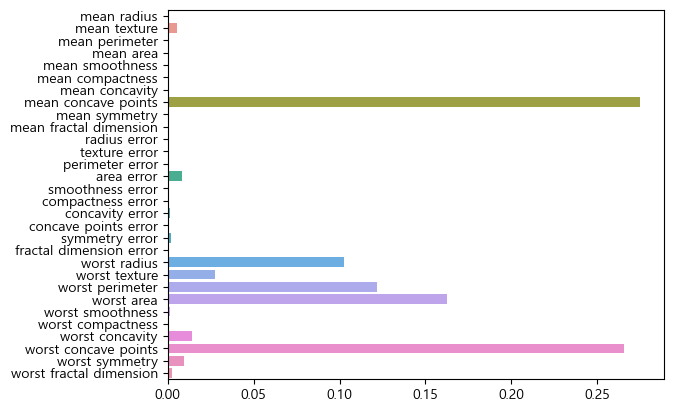

In [71]:
# 특성 중요도
model= GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

sns.barplot(x=model.feature_importances_, y= cancer.feature_names)

In [74]:
params={
    'n_estimators':[100, 200, 300],
    'max_depth':[2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[4,8,10,11,12,13,14],
    'learning_rate':[0.1, 0.01, 0.001, 1.0]
}
grid_clf= GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=1, random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1.0],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [77]:
grid_clf.best_params_

{'learning_rate': 1.0,
 'max_depth': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [78]:
print(grid_clf.score(X_train, y_train))
print(grid_clf.score(X_test, y_test))

1.0
0.965034965034965


### 2) XGBoost

- 트리 기반의 앙상블 방식
- 분류에 있어서는 다른 알고리즘보다 좋은 예측 성능
- GBM 기반이지만,GBM의 단점인 느린 수행과 과적합 규제 부재 등의 문제를 해결 
- 병렬 CPU환경에서는 빠르게 학습이 가능
- conda install -c anaconda py-xgboost

In [80]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
?XGBClassifier

In [81]:
model= XGBClassifier(random_state=0, learning_rate=0.1, max_depth=3).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.965034965034965


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

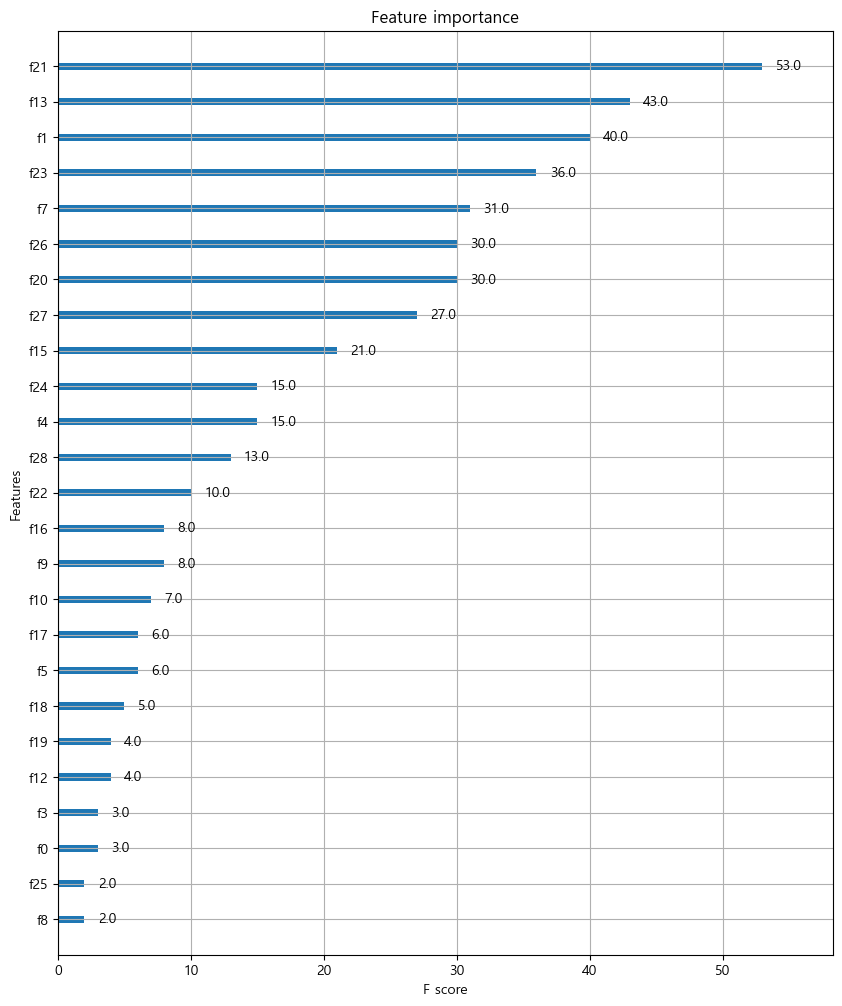

In [83]:
_, ax=plt.subplots(figsize=(10,12))
plot_importance(model, ax= ax)

In [86]:
#### 적합도 검정

cross_val= cross_validate(estimator=model, X=X_train, y=y_train, cv=5)
cross_val

print(cross_val['test_score'].mean(), cross_val['test_score'].std())

0.9647606019151846 0.010584240153747287


### California 주택

In [87]:
from sklearn.datasets import fetch_california_housing

In [88]:
california= fetch_california_housing()
X_train, X_test, y_train, y_test= train_test_split(california.data, california.target, random_state=42)

In [89]:
pd.DataFrame(california.data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
 1   1       20640 non-null  float64
 2   2       20640 non-null  float64
 3   3       20640 non-null  float64
 4   4       20640 non-null  float64
 5   5       20640 non-null  float64
 6   6       20640 non-null  float64
 7   7       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [90]:
model1= LinearRegression().fit(X_train, y_train)

print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.609873031052925
0.5910509795491352


In [93]:
model2= XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, objective='reg:squarederror')
model2.fit(X_train, y_train)

print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.8055193255064026
0.781331812032128


### 당뇨병

In [94]:
from sklearn.datasets import load_diabetes

In [101]:
diabetes= load_diabetes()
print(diabetes.feature_names)
print(diabetes.target)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 26

In [111]:
X_train, X_test, y_train, y_test= train_test_split(diabetes.data, diabetes.target, random_state=42)

In [112]:
model1= LinearRegression().fit(X_train, y_train)

print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.5190348343200994
0.48490866359058016


In [115]:
model2= XGBRegressor(n_estimators=500, learning_rate=00.1, max_depth=3, objective='reg:squarederror')
model2.fit(X_train, y_train)

print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.988300783671347
0.3705746492466916


In [116]:
### 적합도 검정

cross_val= cross_validate(estimator=model, X=X_train, y=y_train, cv=5)
cross_val

print(cross_val['test_score'].mean(), cross_val['test_score'].std())

0.0030303030303030303 0.006060606060606061


### 3) LightGBM

- 빠른 학습시간과 예측 시간
- 더 적은 메모리
- pip install lightgbm

In [117]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric

#### iris sample

In [118]:
iris= load_iris()

In [119]:
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=123, test_size=0.2)

In [122]:
model= LGBMClassifier(n_estimators=100)
model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=[(X_test, y_test)], verbose=True)

[1]	valid_0's multi_logloss: 0.95847
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0's multi_logloss: 0.140169
[26]	valid_0's multi_logloss: 0.138

LGBMClassifier()

In [124]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
0.9666666666666667


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

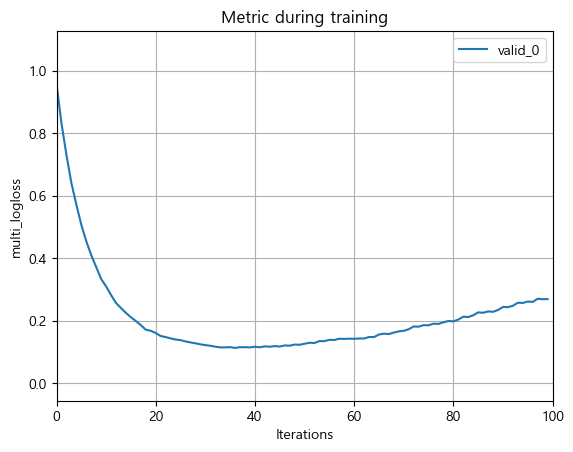

In [123]:
plot_metric(model)

#### California Sample

In [126]:
california= fetch_california_housing()
X_train, X_test, y_train, y_test= train_test_split(california.data, california.target, random_state=42)

In [128]:
model= LGBMRegressor(n_estimators=100)
model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=[(X_test, y_test)], verbose=True)


[1]	valid_0's l2: 1.16283
[2]	valid_0's l2: 1.02756
[3]	valid_0's l2: 0.916963
[4]	valid_0's l2: 0.821253
[5]	valid_0's l2: 0.746683
[6]	valid_0's l2: 0.681512
[7]	valid_0's l2: 0.622827
[8]	valid_0's l2: 0.574682
[9]	valid_0's l2: 0.534902
[10]	valid_0's l2: 0.50245
[11]	valid_0's l2: 0.472656
[12]	valid_0's l2: 0.448665
[13]	valid_0's l2: 0.427001
[14]	valid_0's l2: 0.407672
[15]	valid_0's l2: 0.393788
[16]	valid_0's l2: 0.379775
[17]	valid_0's l2: 0.3662
[18]	valid_0's l2: 0.355743
[19]	valid_0's l2: 0.345494
[20]	valid_0's l2: 0.337253
[21]	valid_0's l2: 0.327643
[22]	valid_0's l2: 0.319412
[23]	valid_0's l2: 0.311759
[24]	valid_0's l2: 0.305131
[25]	valid_0's l2: 0.297484
[26]	valid_0's l2: 0.292113
[27]	valid_0's l2: 0.285865
[28]	valid_0's l2: 0.280194
[29]	valid_0's l2: 0.275744
[30]	valid_0's l2: 0.271333
[31]	valid_0's l2: 0.267862
[32]	valid_0's l2: 0.265065
[33]	valid_0's l2: 0.262503
[34]	valid_0's l2: 0.260544
[35]	valid_0's l2: 0.259157
[36]	valid_0's l2: 0.256226
[37]	v

LGBMRegressor()

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

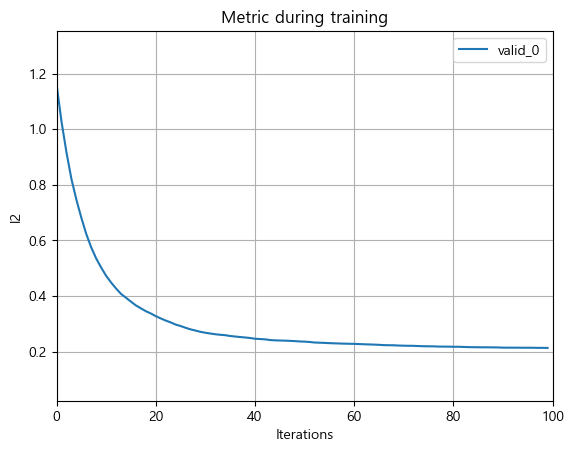

In [129]:
plot_metric(model)

#### 당뇨병 샘플

In [130]:
diabetes= load_diabetes()
X_train, X_test, y_train, y_test= train_test_split(diabetes.data, diabetes.target, random_state=42)

In [131]:
model= LGBMRegressor(n_estimators=100, max_depth=2, learning_rate=0.1)
model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=[(X_test, y_test)], verbose=True)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

[1]	valid_0's l2: 5191.36
[2]	valid_0's l2: 4864.92
[3]	valid_0's l2: 4511.2
[4]	valid_0's l2: 4254.74
[5]	valid_0's l2: 4037.41
[6]	valid_0's l2: 3811.27
[7]	valid_0's l2: 3665.43
[8]	valid_0's l2: 3504.05
[9]	valid_0's l2: 3417.61
[10]	valid_0's l2: 3296.34
[11]	valid_0's l2: 3227.1
[12]	valid_0's l2: 3133.17
[13]	valid_0's l2: 3115.54
[14]	valid_0's l2: 3031.15
[15]	valid_0's l2: 3014.51
[16]	valid_0's l2: 2986.93
[17]	valid_0's l2: 2943.4
[18]	valid_0's l2: 2909.59
[19]	valid_0's l2: 2914
[20]	valid_0's l2: 2914.83
[21]	valid_0's l2: 2869.06
[22]	valid_0's l2: 2866.2
[23]	valid_0's l2: 2837.45
[24]	valid_0's l2: 2814.37
[25]	valid_0's l2: 2817.53
[26]	valid_0's l2: 2820.99
[27]	valid_0's l2: 2811.85
[28]	valid_0's l2: 2795.42
[29]	valid_0's l2: 2780.58
[30]	valid_0's l2: 2752
[31]	valid_0's l2: 2755.84
[32]	valid_0's l2: 2755.21
[33]	valid_0's l2: 2755.6
[34]	valid_0's l2: 2743.86
[35]	valid_0's l2: 2742.14
[36]	valid_0's l2: 2725.46
[37]	valid_0's l2: 2720.37
[38]	valid_0's l2: 27

# 6. Stacking 실습
## (1) Classification

In [132]:
X_train= pd.read_csv('data/X_final_C.csv')
X_test= pd.read_csv('data/test_final_C.csv')
y_train= pd.read_csv('data/y_train_C.csv')
y_test= pd.read_csv('data/y_test_C.csv')

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [136]:
estimators=[('rf',RandomForestClassifier(n_estimators=10, random_state= 42)), ('svm',SVC(random_state=42))]

model= StackingClassifier(estimators= estimators, final_estimator=LogisticRegression())

model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression())

In [137]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8690647482014389
0.7788944723618091
